# Análisis exploratorio de datos de trayectorias de albatros de Laysan

Minería de datos

Presenta: Ana Maritza Bello Yañez

In [1]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
trajectories = pd.read_csv('../data/trajectories.csv')
trajectories.head()

,id,geom,date,latitude,longitude,name,season
0,1,0101000020E61000007A17EFC7ED945DC0809F71E1401C...,2014-01-19,29.110365,-118.327013,LAAL01,incubacion
1,2,0101000020E6100000F261F6B2ED945DC01C42959A3D1C...,2014-01-19,29.110315,-118.327008,LAAL01,incubacion
2,3,0101000020E6100000A4C4AEEDED945DC0CE70033E3F1C...,2014-01-19,29.110340,-118.327022,LAAL01,incubacion
3,4,0101000020E610000080D4264EEE945DC00116F9F5431C...,2014-01-19,29.110412,-118.327045,LAAL01,incubacion
4,5,0101000020E6100000166C239EEC945DC06C98A1F1441C...,2014-01-19,29.110427,-118.326942,LAAL01,incubacion


In [3]:
trajectories["date"] = trajectories["date"].astype("datetime64[ns]")
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176767 entries, 0 to 176766
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         176767 non-null  int64         
 1   geom       176767 non-null  object        
 2   date       176767 non-null  datetime64[ns]
 3   latitude   176767 non-null  float64       
 4   longitude  176767 non-null  float64       
 5   name       176767 non-null  object        
 6   season     176767 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [4]:
trajectories.nunique()

id           176767
geom         167663
date            346
latitude     116002
longitude    116791
name             47
season            4
dtype: int64

<Axes: title={'center': 'Numero de datos por mes y año'}, xlabel='Year, month', ylabel='Cantidad de datos'>

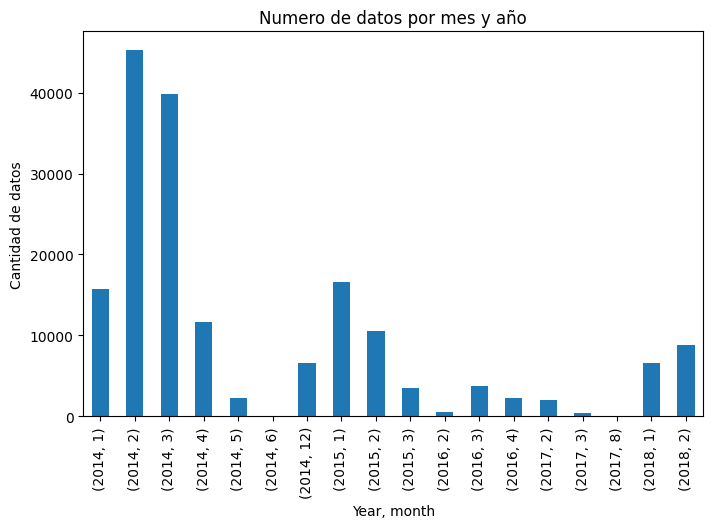

In [5]:
trajectories["day"] = trajectories["date"].dt.day
trajectories["month"] = trajectories["date"].dt.month
trajectories["year"] = trajectories["date"].dt.year
data_by_year = trajectories.groupby(["year", "month"]).size()
data_by_year.plot(kind="bar", figsize=(8, 5), 
                  title="Numero de datos por mes y año", 
                  xlabel="Year, month", ylabel="Cantidad de datos")

<Axes: title={'center': 'Numero de datos por mes (todos los años)'}, xlabel='Mes', ylabel='Cantidad de datos'>

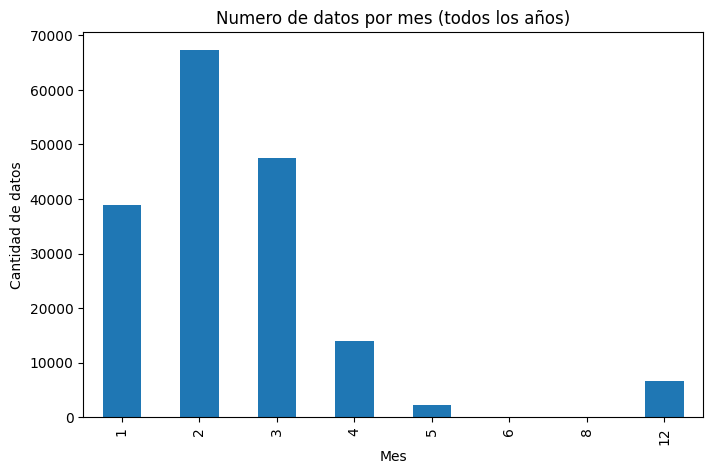

In [6]:
data_by_month = trajectories.groupby(["month"]).size()
data_by_month.plot(kind="bar", figsize=(8, 5), 
                  title="Numero de datos por mes (todos los años)", 
                  xlabel="Mes", ylabel="Cantidad de datos")

<Axes: xlabel='season', ylabel='count'>

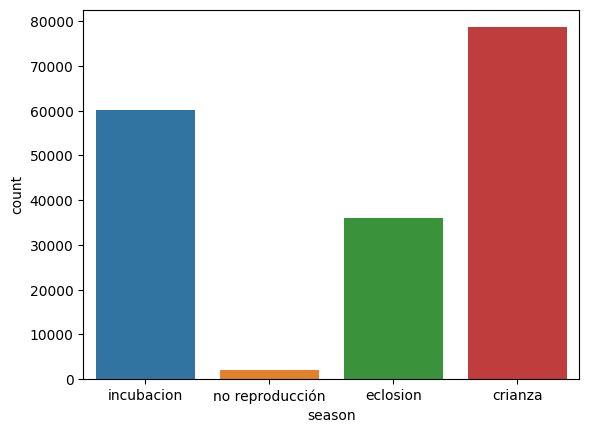

In [7]:
sns.countplot(data=trajectories, x="season")

In [8]:
latitude_bp = trajectories["longitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,-119.930254,6.512082,-152.484617,-118.988526,-118.290809,-116.732136,-114.426870
eclosion,36047.0,-118.821732,1.987504,-134.777405,-118.667530,-118.291907,-118.291010,-115.088970
incubacion,60052.0,-123.130844,8.225292,-158.980523,-125.916032,-118.292085,-118.291482,-116.210052
no reproducción,2012.0,-122.608585,8.280744,-149.298640,-121.827006,-118.291919,-118.291445,-118.251228


In [9]:
latitude_bp = trajectories["latitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,31.106044,4.513409,26.377728,28.884100,29.387503,30.636786,50.856988
eclosion,36047.0,29.578935,1.661481,27.067830,28.883832,28.884655,29.816597,47.218990
incubacion,60052.0,32.050418,5.368645,25.933687,28.883862,28.884527,33.972980,51.257980
no reproducción,2012.0,31.281592,5.169273,27.298212,28.883812,28.884065,28.884655,44.503535


<Axes: xlabel='longitude', ylabel='latitude'>

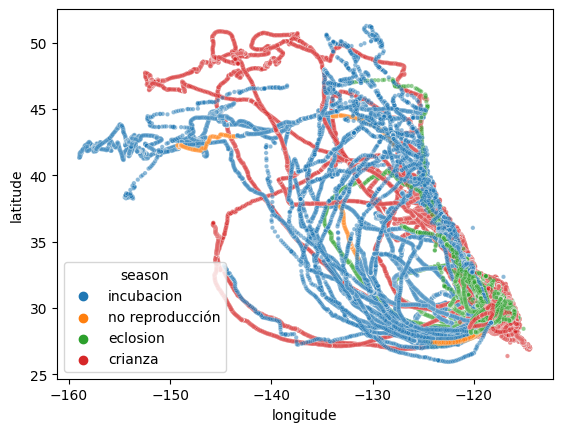

In [10]:
sns.scatterplot(data = trajectories, x="longitude", y="latitude", hue="season", alpha=0.5, s=10)

# Distribución geográfica durante la incubación

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2014')

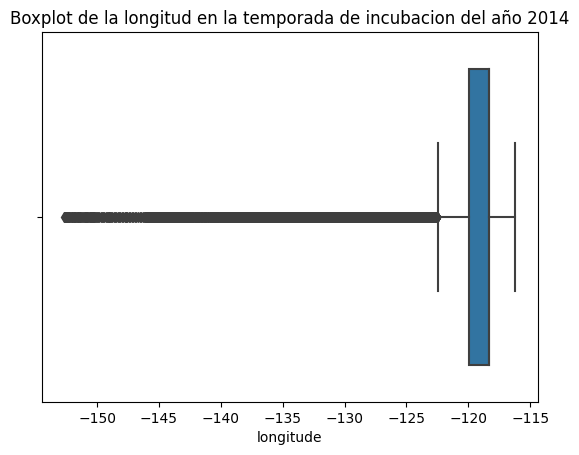

In [26]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2015')

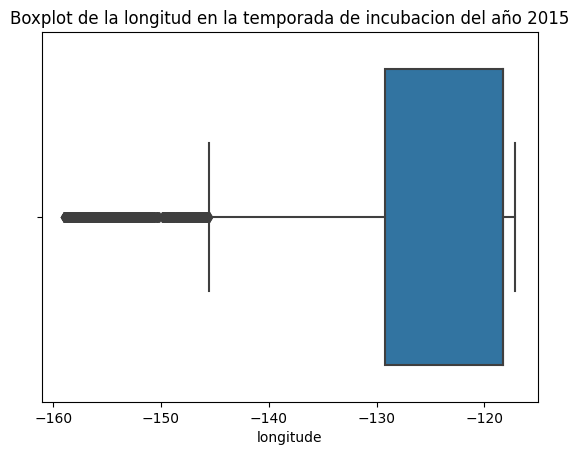

In [27]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de incubacion del año 2014')

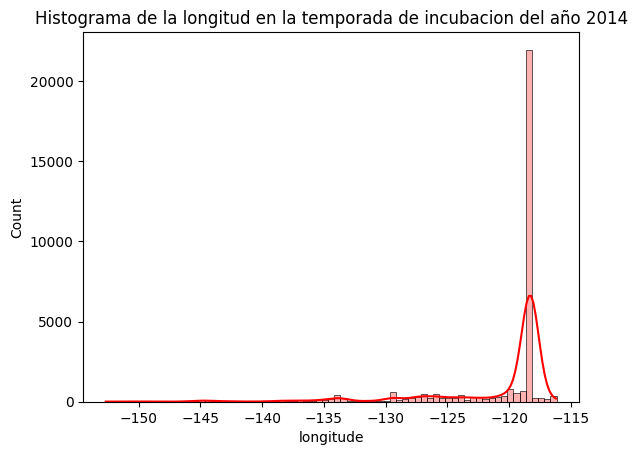

In [29]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2014')

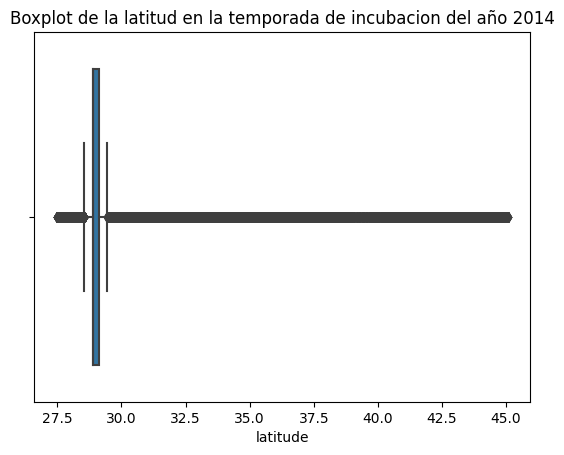

In [32]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2015')

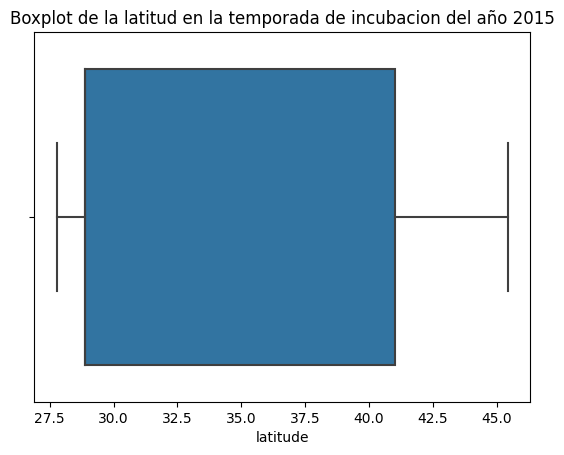

In [34]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de incubacion')

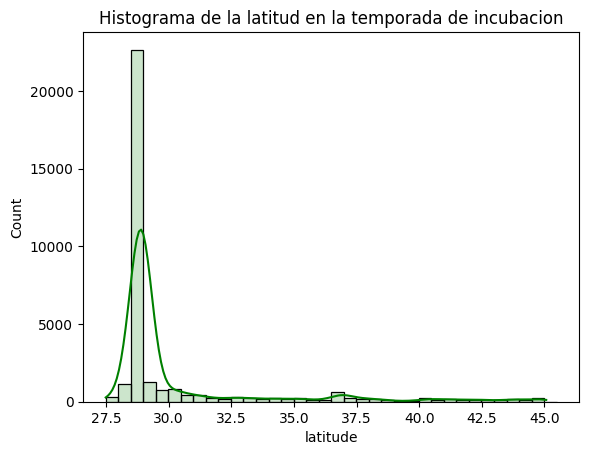

In [33]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.2)
plt.title("Histograma de la latitud en la temporada de incubacion")

# Distribución geográfica durante la crianza

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de crianza')

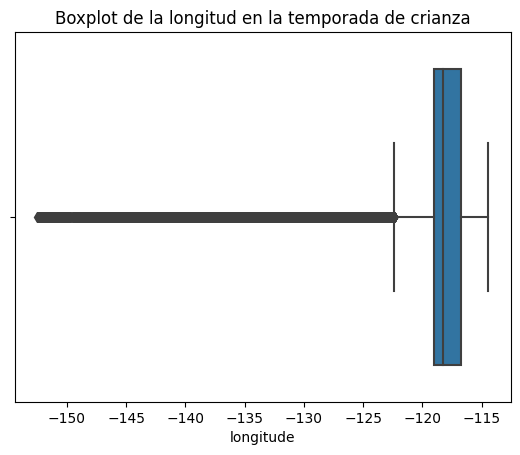

In [15]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="longitude")
plt.title("Boxplot de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de crianza')

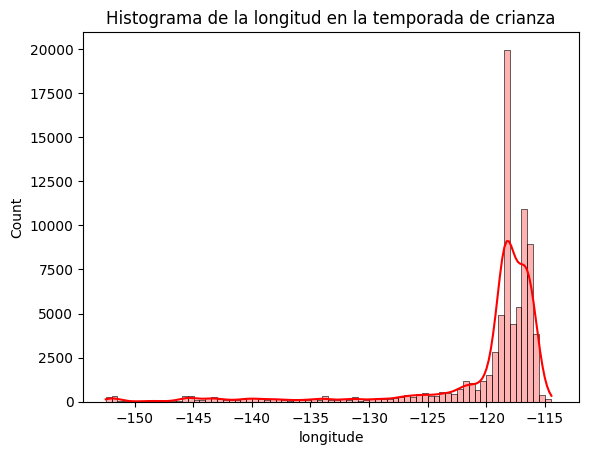

In [16]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de crianza')

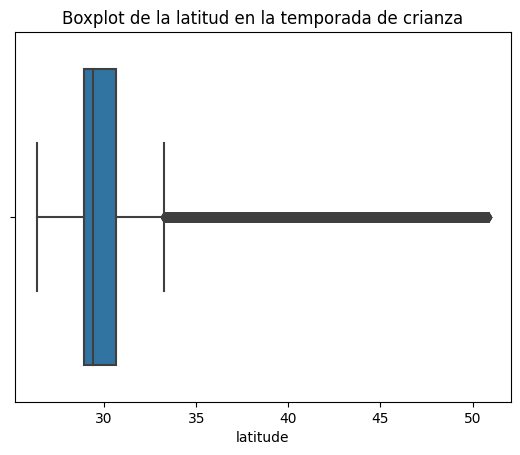

In [17]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="latitude")
plt.title("Boxplot de la latitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de crianza')

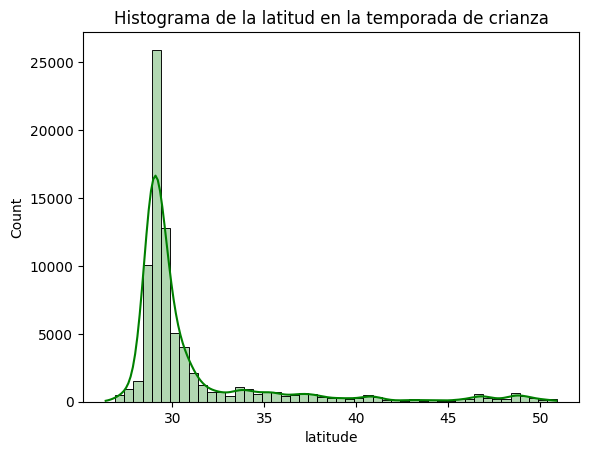

In [18]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.3)
plt.title("Histograma de la latitud en la temporada de crianza")